In [1]:
import matplotlib.pyplot as plt
import ROOT
from scipy.spatial import KDTree
import numpy as np

# Notebook to experiment with transforming the data to other forms

For instance
- "transforming" to 3D (just using intensity as z dimension). This can depend on scale.
- Attractor transformation where the high intensity points pull the others closer
- Cutoff transformation. Just removing points that are below a certain intensity. Absolute and relative.
- Dimensionally reduced from 3D to 2D (pca, t-sne and umap).
- Multiply. Multiply each x,y point by value. Inplace, randomly distributed, grid.

# Attractor

In [399]:
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5], dtype=np.float32)
v = np.array([5,1,10,1,1,2,1,1,1,1,1], dtype=np.float32)
N=len(x)
diff = np.zeros(N*N).reshape(N,N)
shift = np.zeros_like(diff)
alpha=1
for i in range(len(x)):
    d = x-x[i]
    d[d == 0] = 1
    diff[i] = d
    shift[i] = (1/diff[i])*v
    shift[i][i]=0

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def move_towards_value(x,v,idx):
#    print(f"Shifting towards {v[idx]} at {x[idx]}")

    # Normalize
    x = x
#    v[idx]=1000
#    v = v/v.max()

    d = x[idx]-x
#    d[idx]=1
    d[d == 0] = 1
#    print(d)
    d=1/d
    d[d == 1] = 0
#    d[idx]=0
    cubic_saturate
#    shift=np.sign(d)*sigmoid(d*v[idx])
    shift=alg_saturate(d*v[idx])
    shift[idx]=0

    new_x = x+shift
#    print(d)
#    print(shift)
    
#    fig, ax = plt.subplots()
#    ax.scatter(x,np.ones_like(x)*1, label="original", alpha=0.7, marker=".")
#    ax.scatter(new_x,np.ones_like(x)*2, label="shifted", alpha=0.7, marker=".")
#    ax.axvline(x[idx])
#    ax.set_ylim(0,10)
#    ax.legend()
    return new_x

#move_towards_value(x,v,2)

In [400]:
filename = "/home/bjartur/workspace/focalh_data_transformer/data/converted/E150_P2_N1000.root"
tfile = ROOT.TFile(filename, "READ")
ttree = tfile.Get("EventsTree")
Nentries = ttree.GetEntries()

ttree.GetEntry(0)
npx = np.array(ttree.x, dtype=np.float32)
npy = np.array(ttree.y, dtype=np.float32)
npval = np.array(ttree.value, dtype=np.float32)

#print(npx)
#print(npval)


new_x = move_towards_value(npx, npval, npval.argmax())
new_y = move_towards_value(npy, npval, npval.argmax())

In [405]:
new_x = npx
new_y = npy
for i in range(249):
    pass
#    new_x = move_towards_value(new_x, npval, npval.argmax())
#    new_y = move_towards_value(new_y, npval, npval.argmax())

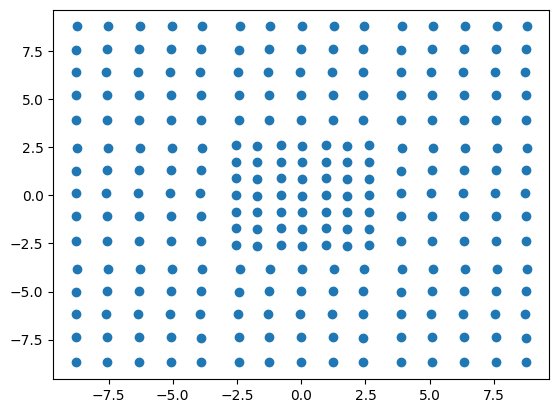

In [406]:
fig, ax = plt.subplots()
ax.scatter(new_x,new_y)

In [ ]:
# Have to extend to 2D...

x [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
sigmoid: [0.00669285 0.01798621 0.04742587 0.11920293 0.2689414  0.5
 0.7310586  0.880797   0.95257413 0.98201376 0.9933072 ]
exp_saturate: [-147.41316     -53.59815     -19.085537     -6.3890557    -1.718282
    0.            0.6321206     0.86466473    0.95021296    0.9816844
    0.99326205]


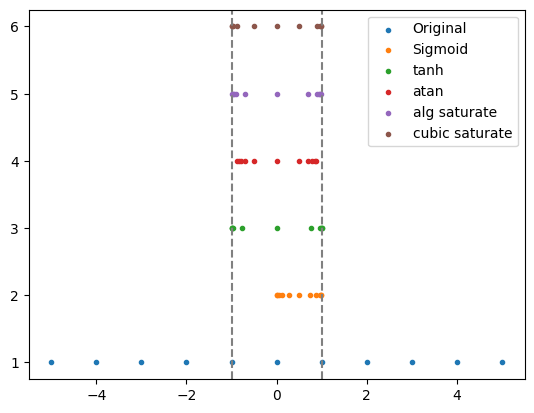

In [364]:
def exp_saturate(x, k=1.0):
    return 1 - np.exp(-k * x)

def my_tanh(x, k=1.0):
    return np.tanh(k * x)

def my_atan(x, k=1.0):
    return (2/np.pi) * np.arctan(k * x)

def alg_saturate(x):
    return x / np.sqrt(1 + x**2)

def cubic_saturate(x):
    return x**3 / (1 + np.abs(x)**3)

print("x",x)
print("sigmoid:",sigmoid(x))
print("exp_saturate:",exp_saturate(x))
fig,ax = plt.subplots()
ax.scatter(x,np.ones_like(x)*1, marker=".", label="Original")
ax.scatter(sigmoid(x),np.ones_like(x)*2, marker=".", label="Sigmoid")
ax.scatter(my_tanh(x),np.ones_like(x)*3, marker=".", label="tanh")
ax.scatter(my_atan(x),np.ones_like(x)*4, marker=".", label="atan")
ax.scatter(alg_saturate(x),np.ones_like(x)*5, marker=".", label="alg saturate")
ax.scatter(cubic_saturate(x),np.ones_like(x)*6, marker=".", label="cubic saturate")
ax.axvline(-1, color="grey", linestyle="dashed")
ax.axvline(1, color="grey", linestyle="dashed")
ax.legend()
#ax.scatter(exp_saturate(x),np.ones_like(x)*2)

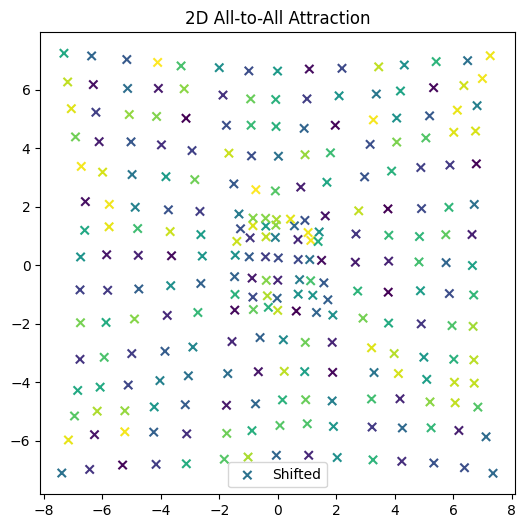

In [330]:
import numpy as np
import matplotlib.pyplot as plt

def all_to_all_attraction_2d(points, values, beta=1.0, step_size=0.1):
    """
    For each 2D point, compute the net attraction from all other points,
    weighted by intensity and inversely by distance^beta.
    """
    new_points = np.zeros_like(points)
    for i in range(len(points)):
        # Vector from point i to all other points
        diff = points - points[i]
        # Distance from point i to all other points
        dist = np.linalg.norm(diff, axis=1)
        # Avoid division by zero
        dist[dist == 0] = 1.0
        # Attraction vector: (intensity / dist^beta) * unit vector
        attraction = (values / (dist ** beta))[:, np.newaxis] * (diff / dist[:, np.newaxis])
        # Sum all attractions (excluding self)
        net_attraction = np.sum(attraction, axis=0)
        # Update position
        new_points[i] = points[i] + step_size * net_attraction
    return new_points

# Create a 10x10 grid of points
#x, y = np.meshgrid(np.linspace(0, 9, 10), np.linspace(0, 9, 10))
points = np.column_stack((npx, npy))
# Random intensity values
np.random.seed(42)
values = npval#np.random.rand(len(points))
#values[55]=50
#values[0]=50
#values[-1]=50

# Apply attraction
new_points = all_to_all_attraction_2d(points, values, beta=1, step_size=0.2)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.scatter(points[:, 0], points[:, 1], c=values, label="Original", cmap='viridis')
ax.scatter(new_points[:, 0], new_points[:, 1], c=values, label="Shifted", cmap='viridis', marker='x')
ax.set_aspect('equal')
ax.legend()
#plt.colorbar(ax.scatter(points[:, 0], points[:, 1], c=values, cmap='viridis'), label='Intensity')
plt.title("2D All-to-All Attraction")
plt.show()


# PCA

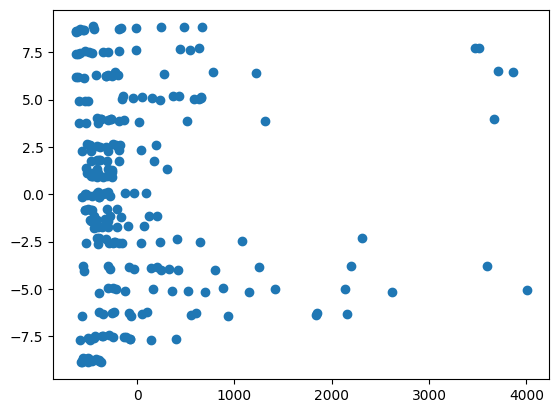

In [432]:
from sklearn.decomposition import PCA

filename = "/home/bjartur/workspace/focalh_data_transformer/data/converted/E150_P5_N1000.root"
tfile = ROOT.TFile(filename, "READ")
ttree = tfile.Get("EventsTree")
Nentries = ttree.GetEntries()
ttree.GetEntry(0)
npx = np.array(ttree.x, dtype=np.float32)
npy = np.array(ttree.y, dtype=np.float32)
npval = np.array(ttree.value, dtype=np.float32)



X = np.column_stack([npx,npy,npval])
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
fig,ax = plt.subplots()
ax.scatter(X_r[:,0], X_r[:,1])

# Multiply

In [2]:

filename = "/home/bjartur/workspace/python_focalh_clustering/data/E150_P2_N100.root"
tfile = ROOT.TFile(filename, "READ")
ttree = tfile.Get("EventsTree")
Nentries = ttree.GetEntries()
ttree.GetEntry(55)
npx = np.array(ttree.x, dtype=np.float32)
npy = np.array(ttree.y, dtype=np.float32)
npval = np.array(ttree.value, dtype=np.float32)

In [3]:
#nplabels = np.repeat(nplabels, vals)
sat = npval.max()#4095
npval100 = (10*npval/sat).astype(int) # normalize w.r.t saturation rather?
#npval100[npval100 <= 0] = 1
noisex = 1.4525251*np.random.rand(npval100.sum())-0.5
noisey = 1.4525251*np.random.rand(npval100.sum())-0.5

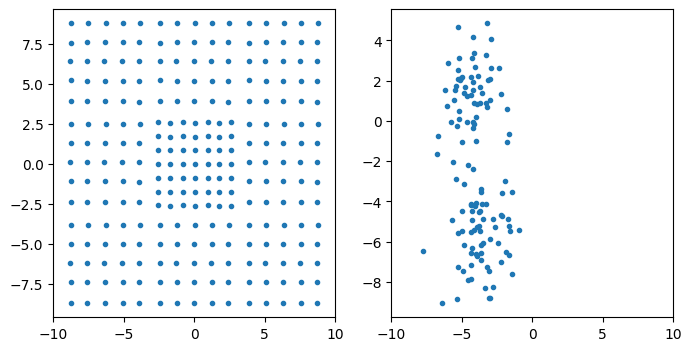

In [4]:
fig,ax=plt.subplots(ncols=2, figsize=(8,4))

ax[0].scatter(npx,npy, marker=".")
ax[1].scatter(np.repeat(npx, npval100)+noisex, np.repeat(npy, npval100)+noisey, marker=".")
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
fig.savefig("transform_multiply.png", bbox_inches="tight")

In [5]:
X = np.column_stack([np.repeat(npx, npval100)+noisex, np.repeat(npy, npval100)+noisey])

In [6]:
from sklearn import cluster, datasets, mixture
gmm = mixture.GaussianMixture(
    n_components=3,
    covariance_type="full",
    #random_state=params["random_state"],
)

bay_gauss = mixture.BayesianGaussianMixture(
    n_components=10,
#    covariance_type='diag',
#    weight_concentration_prior_type='dirichlet_process',
#    weight_concentration_prior=0.1,
#    init_params='kmeans',
#    random_state=12
)

dbscan = cluster.DBSCAN(1)
hdbscan = cluster.HDBSCAN(min_samples=1, min_cluster_size=20, allow_single_cluster=False)

gmm.fit(X)
X_pred = gmm.predict(X)

bay_gauss.fit(X)
X_pred_bay_gauss = bay_gauss.predict(X)


dbscan.fit(X)
X_pred_dbscan = dbscan.labels_.astype(int)

hdbscan.fit(X)
X_pred_hdbscan = hdbscan.labels_.astype(int)



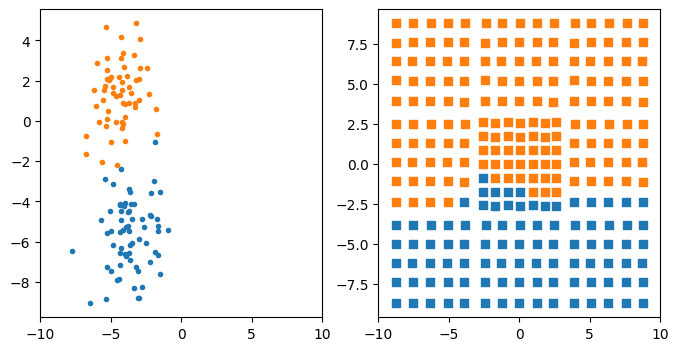

In [8]:
kdtree = KDTree(X)
X_o = np.column_stack([npx,npy])
fig,ax=plt.subplots(ncols=2, figsize=(8,4))
X_pred = X_pred_bay_gauss
for l in set(X_pred):
    # Remember that I need to similarly always carry the mapping along
    mask = X_pred == l
    if l == -1:
        continue

    # Mapping
    kdq = kdtree.query(X_o)
#    kdq_mask = kdq[0] < 1.4525251/2
    kdq_mask = kdq[0] == kdq[0]
    ol = X_pred[kdq[1][kdq_mask]]

    
    omask = ol == l
    ax[0].scatter(X[:,0][mask], X[:,1][mask], marker=".")
    ax[0].set_xlim(-10,10)
    ax[1].scatter(npx[kdq_mask][omask],npy[kdq_mask][omask], marker="s")
    ax[1].set_xlim(-10,10)

fig.savefig("transform_multiply_gmm.png", bbox_inches="tight")


In [654]:
idx = kdtree.query(X_o)[1]
X_pred[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [657]:
idx

array([   0,    0,    1,    1,    2,   11,    0,    1,    3,    6,   10,
         10,   20,   12,    9,   14,   16,   19,   21,   23,   15,   18,
         27,   32,   35,   36,   37,   40,   39,   60,   64,   72,   82,
         88,   98,  110,  124,  143,  158,  179,  113,  198,  230,  258,
        311,  322,  332,  342,  377,  399,  454,  459,  476,  465,  486,
        467,  474,  476,  479,  484,  487,  498,  504,  516,  515,  528,
        566,  572,  585,  606,  657,  745,  749,  807,  846,   25,  858,
        860,  865,  867,  858,  871,  872,  875,  868,  880,  881,  882,
        886,  890,  896,  894,  899,  901,  912,  914,  916,  920,  922,
        905,  927,  937,  936,  940,  952,  968, 1036,  929,  938,  942,
        950, 1086, 1075, 1099, 1113, 1110, 1055, 1071, 1081, 1134, 1098,
       1112, 1114, 1158, 1163, 1130, 1170, 1133, 1201, 1155, 1202, 1159,
       1221, 1171, 1228, 1245, 1199, 1256, 1257, 1277, 1291, 1293, 1302,
       1248, 1249, 1326, 1264, 1288, 1286, 1437, 14

### Reverse mapping test

In [707]:
kdtree_reverse = KDTree(X_o)
dist_r, idx_r = kdtree_reverse.query(X)

In [737]:
old_l =   np.array([1,2,3,4,5]) # Low dim
new_l =   np.array([2,1,3,2,4,2,1,1,2,1]) # High dim
mapping = np.array([1,2,3,3,4,2,0,1,4,1]) # High dim
new_v =   np.array([1,4,3,4,5,6,7,3,4,5]) # High dim
old_l[mapping]
print("new l\told l\tV")
for i in range(new_l.shape[0]):
    print(f"{new_l[i]}\t{old_l[mapping[i]]}\t{new_v[i]}")

new l	old l	V
2	2	1
1	3	4
3	4	3
2	4	4
4	5	5
2	3	6
1	1	7
1	2	3
2	5	4
1	2	5


In [740]:
import numpy as np

def map_highd_to_lowd(lowd_l, highd_l, mapping, value):
    for i in range(len(lowd_l)):
        mask = (mapping == i)
        if np.any(mask):
            best_idx = np.argmax(value[mask])
            lowd_l[i] = highd_l[mask][best_idx]
    return lowd_l


updated_old_l = map_highd_to_lowd(old_l, new_l, mapping, new_v)
print("Updated old_l:", updated_old_l)


Updated old_l: [1 1 2 2 4]


(2710,)

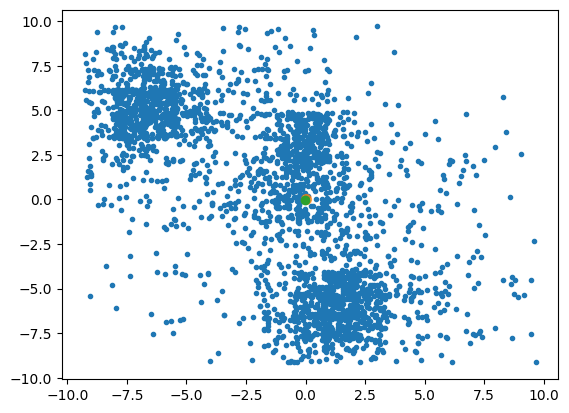

In [674]:
kdtree = KDTree(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], marker=".")
distance, index = kdtree.query((0,0))
ax.scatter([0],[0],s=50,alpha=0.7)
ax.scatter(X[:,0][index], X[:,1][index])


#tree = KDTree(centers)


In [521]:
np.ediff1d(npx).max()

np.float32(1.4525251)

In [507]:
noisex

array([ 0.61380863,  1.39002466,  1.14451346, ...,  0.64399145,
       -0.37645949, -0.47076217])

In [468]:
noise

array([-0.43418824,  0.39131821, -0.03618575, ..., -0.08790343,
       -0.27622161,  0.43253609])

In [465]:
np.random.rand(10)-0.5

array([ 0.48883553, -0.27427228, -0.11010025, -0.01995262, -0.36198451,
       -0.41896139,  0.32972287,  0.47679437, -0.09527494, -0.41235016])